In [1]:
from modsim import *
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import random

# Modelo actual: Autobus

In [2]:
#Tiempo de llegada en Caribe Tours: 2h 2min
#15 minutos de paradas
#Distancia total: 140.83 km (87.51 mi) distancia de santo domingo a santiago con paradas en bonao y la vega

#Tren
#61km/h velocidad minima operativa del tren   94 km/h velocidad promedio   127 km/h velocidad maxima
#3 minutos de paradas
#Paradas de Santo Domingo a Santiago: 1. Bonao   2.La Vega


In [3]:
#d = ((V0+Vf)/2)*t formula movimiento rectilineo uniformemente variado
#De la cual dedujimos que:
#tiempo(t)=(2d)/(V0+Vf)

In [4]:
#tiempo en segundos
#distancia en metros
#velocidad en m/s
autobus = System(t_0=0,
                t_parada=900,
                cant_paradas=3,
                v=25,
                dist_parada1=82400,
                dist_parada2=36100,
                dist_parada3=36400
               )
autobus

,values
t_0,0
t_parada,900
cant_paradas,3
v,25
dist_parada1,82400
dist_parada2,36100
dist_parada3,36400


In [5]:
def calculo_tiempo_sinparadas(system):
    t_trayecto=TimeSeries()
    dist=[system.dist_parada1,system.dist_parada2,system.dist_parada3]
    arr=[0,1,2]
    tfinal=0
    for parada in arr:
        t_trayecto[parada]=2*dist[parada]/system.v
    
    for t in arr:
        tfinal+=t_trayecto[t]
    
    return tfinal

In [6]:
tf=calculo_tiempo_sinparadas(autobus)
print('Tiempo final en horas sin paradas: ', round((tf)/3600,2))

Tiempo final en horas sin paradas:  3.44


In [7]:
def calculo_tiempo_conparadas(system):
    t_trayecto=TimeSeries()
    dist=[system.dist_parada1,system.dist_parada2,system.dist_parada3]
    arr=[0,1,2]
    tfinal=0
    for parada in arr:
        t_trayecto[parada]=2*dist[parada]/system.v
    
    for t in arr:
        tfinal+=t_trayecto[t]
    
    return tfinal+system.t_parada*2

In [8]:
tf_parada=calculo_tiempo_conparadas(autobus)
print('Tiempo final en horas con paradas: ', round((tf_parada)/3600,2))

Tiempo final en horas con paradas:  3.94


In [9]:
#Convertir valores de segundos a horas
tf_h=tf/3600
tf_parada_h=tf_parada/3600

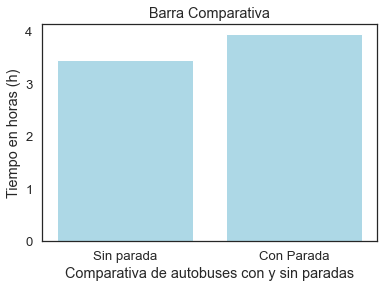

In [10]:
eje_x = ['Sin parada', 'Con Parada']
eje_y = [tf_h,tf_parada_h]
plt.bar(eje_x, eje_y, color='lightblue')
plt.ylabel('Tiempo en horas (h)')
plt.xlabel('Comparativa de autobuses con y sin paradas')
plt.title('Barra Comparativa')
plt.show()

In [11]:
print('Tiempo final en horas sin paradas: ', round((tf)/3600,2))
print('Tiempo final en horas con paradas: ', round((tf_parada)/3600,2))

Tiempo final en horas sin paradas:  3.44
Tiempo final en horas con paradas:  3.94


# Modelo a implementar: Tren

In [12]:
#El tren utilizado como referencia es el Commuter Rail con velocidad minima operativa de 61km/h 
#velocidad maxima operativa 127km/h
#En este modelo utilizaremos la velocidad operativa promedio que seria el resultado de
#(127+61)/2=94km/h
tren_v_avg= System(t_0=0,    
             t_parada=180,   
             cant_paradas=3,  
             v=26.1111,      
             dist_parada1=73150,
             dist_parada2=33270,
             dist_parada3=33000
             )
tren_v_avg

,values
t_0,0.0000
t_parada,180.0000
cant_paradas,3.0000
v,26.1111
dist_parada1,73150.0000
dist_parada2,33270.0000
dist_parada3,33000.0000


In [13]:
tf_tren=calculo_tiempo_conparadas(tren_v_avg)
tf_tren_h=tf_tren/3600
print('Tiempo final en horas con paradas: ', round((tf_tren)/3600,2))

Tiempo final en horas con paradas:  3.07


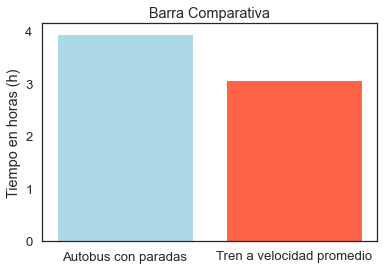

In [14]:
eje_x = ['Autobus con paradas', 'Tren a velocidad promedio']
eje_y = [tf_parada_h,tf_tren_h]
plt.bar(eje_x, eje_y, color=['lightblue','tomato'])
plt.ylabel('Tiempo en horas (h)')
plt.title('Barra Comparativa')
plt.show()

In [15]:
print('Tiempo final de autobus con paradas:',round(tf_parada_h,2),' - ','Tiempo final de tren con paradas:',round(tf_tren_h,2))

Tiempo final de autobus con paradas: 3.94  -  Tiempo final de tren con paradas: 3.07


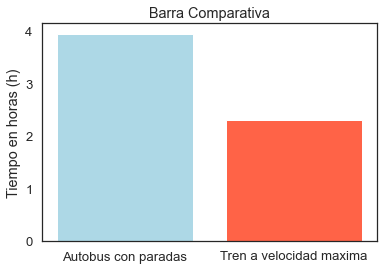

In [16]:
tren_v_max= System(t_0=0,
             t_parada=180,
             cant_paradas=3,
             v=35.2778,
             dist_parada1=73150,
             dist_parada2=33270,
             dist_parada3=33000
             )

tf_tren_max=calculo_tiempo_conparadas(tren_v_max)
tf_tren_max_h=tf_tren_max/3600

eje_x = ['Autobus con paradas', 'Tren a velocidad maxima']
eje_y = [tf_parada_h,tf_tren_max_h]
plt.bar(eje_x, eje_y, color=['lightblue','tomato'])
plt.ylabel('Tiempo en horas (h)')
plt.title('Barra Comparativa')
plt.show()

In [17]:
print('Tiempo final de autobus con paradas:',round(tf_parada_h,2),'h',' - ','Tiempo final de tren con paradas:',round(tf_tren_max_h,2),'h')

Tiempo final de autobus con paradas: 3.94 h  -  Tiempo final de tren con paradas: 2.3 h


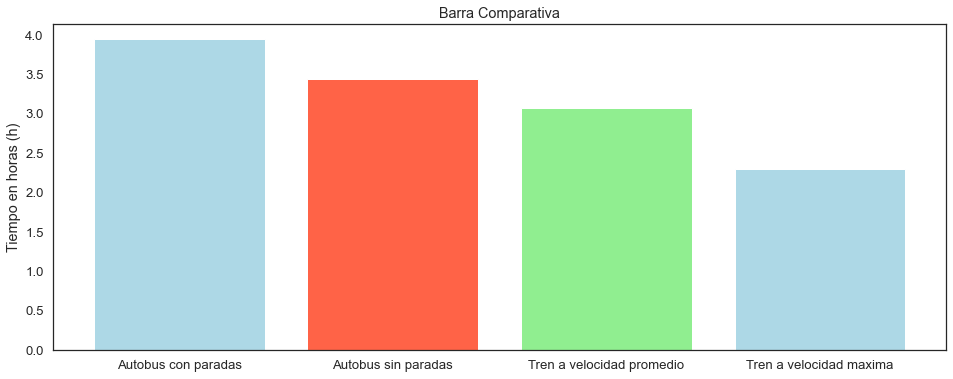

In [18]:
plt.rcParams["figure.figsize"] = (16,6)

eje_x = ['Autobus con paradas', 'Autobus sin paradas','Tren a velocidad promedio', 'Tren a velocidad maxima']
eje_y = [tf_parada_h,tf_h,tf_tren_h, tf_tren_max_h]
plt.bar(eje_x, eje_y, color=['lightblue','tomato','lightgreen'])
plt.ylabel('Tiempo en horas (h)')
plt.title('Barra Comparativa')
plt.show()

# Tiempos considerando horas pico

In [19]:
#valor obtenido de investigacion del Observatorio de Políticas Sociales y Desarrollo(OPSD) (14.3 minutos)
#mismo criterio de calculos pasados considerando tapones
tiempo_tapones = 858 
def calculo_tiempo_tapones(system,tiempo_tapones): 
    t_trayecto=TimeSeries()
    dist=[system.dist_parada1,system.dist_parada2,system.dist_parada3]
    arr=[0,1,2]
    tfinal=0
    for parada in arr:
        t_trayecto[parada]=2*dist[parada]/system.v
    
    for t in arr:
        tfinal+=t_trayecto[t]
    
    return tfinal+tiempo_tapones+system.t_parada*2

In [20]:
t_autobus_tapones = calculo_tiempo_tapones(autobus,tiempo_tapones)
t_autobus_tapones_h= t_autobus_tapones/3600

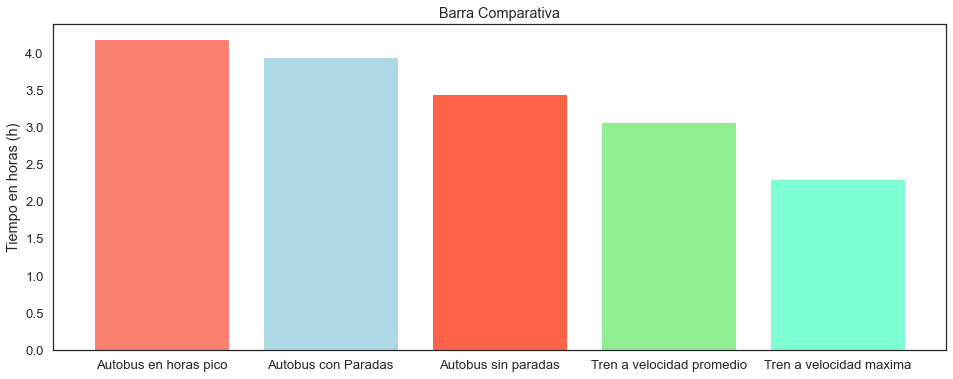

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,6)
eje_x = ['Autobus en horas pico','Autobus con Paradas', 'Autobus sin paradas','Tren a velocidad promedio','Tren a velocidad maxima' ]
eje_y = [t_autobus_tapones_h,tf_parada_h,tf_h,tf_tren_h,tf_tren_max_h]
plt.bar(eje_x, eje_y, color=['salmon','lightblue','tomato','lightgreen','aquamarine'])
plt.ylabel('Tiempo en horas (h)')
plt.title('Barra Comparativa')
plt.show()

In [22]:
print('Tiempo final de autobus en horas pico:',round(t_autobus_tapones_h,2),'h',' - ','Tiempo final de tren con paradas:',round(tf_tren_h,2),'h')

Tiempo final de autobus en horas pico: 4.18 h  -  Tiempo final de tren con paradas: 3.07 h


# Tarifas

In [24]:
#Costo de boleto de ida estandar en el tren: RD$345.00 precio obtenido de las tarifas del tren Tri Rail South Florida
#Costo de boleta de ida estandar en el autobus: RD$300.00 precio obtenido de las tarifas de Caribe Tours

precio_tren=345
precio_autobus=300

print('Tiempo al usar autobus considerando tapones:',round(t_autobus_tapones_h,2),'h',' Precio: RD$',precio_autobus)
print('Tiempo al usar tren con velocidad promedio:',round(tf_tren_h,2),'h',' Precio: RD$',precio_tren)

Tiempo al usar autobus considerando tapones: 4.18 h  Precio: RD$ 300
Tiempo al usar tren con velocidad promedio: 3.07 h  Precio: RD$ 345


# Viajes hacia las paradas por separado

# Hacia la Vega

In [25]:
#RD$250
#Considerando datos obtenidos del sitio web oficial de Caribe Tours
def tiempo_stodgo_lavega(system,tiempo_tapones):
    t_trayecto=TimeSeries()
    dist=[system.dist_parada1,system.dist_parada2]
    arr=[0,1]
    tfinal=0
    for parada in arr:
        t_trayecto[parada]=2*dist[parada]/system.v
    
    for t in arr:
        tfinal+=t_trayecto[t]
    
    return tfinal+tiempo_tapones+system.t_parada

def tiempo_stodgo_lavega_tren(system):
    t_trayecto=TimeSeries()
    dist=[system.dist_parada1,system.dist_parada2]
    arr=[0,1]
    tfinal=0
    for parada in arr:
        t_trayecto[parada]=2*dist[parada]/system.v
    
    for t in arr:
        tfinal+=t_trayecto[t]
    
    return tfinal+system.t_parada

In [27]:
t_autobus_vega=tiempo_stodgo_lavega(autobus,tiempo_tapones)
t_tren_vega=tiempo_stodgo_lavega_tren(tren_v_avg)
print('Tiempo al usar autobus considerando tapones para llegar a La Vega:',round(t_autobus_vega/3600,2))
print('Tiempo al usar tren para llegar a La Vega:',round(t_tren_vega/3600,2))


Tiempo al usar autobus considerando tapones para llegar a La Vega: 3.12
Tiempo al usar tren para llegar a La Vega: 2.31


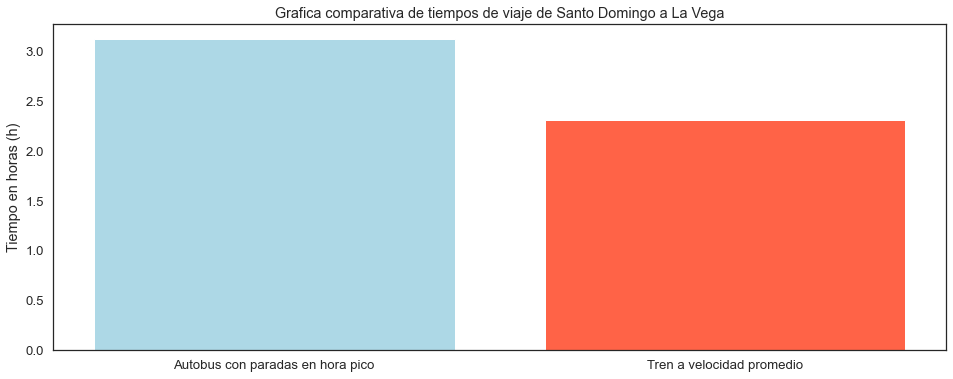

In [28]:
#Grafica comparativa de tiempos de viaje de Santo Domingo a La Vega
eje_x = ['Autobus con paradas en hora pico', 'Tren a velocidad promedio']
eje_y = [round(t_autobus_vega/3600,2),round(t_tren_vega/3600,2)]
plt.bar(eje_x, eje_y, color=['lightblue','tomato'])
plt.ylabel('Tiempo en horas (h)')
plt.title('Grafica comparativa de tiempos de viaje de Santo Domingo a La Vega')
plt.show()

In [29]:
precio_autobus_lavega=250

print('Tiempo al usar autobus en horas pico:',round(t_autobus_vega/3600,2),'h',' Precio: RD$',precio_autobus_lavega)
print('Tiempo al usar tren con velocidad promedio:',round(t_tren_vega/3600,2),'h',' Precio: RD$',precio_tren)

Tiempo al usar autobus en horas pico: 3.12 h  Precio: RD$ 250
Tiempo al usar tren con velocidad promedio: 2.31 h  Precio: RD$ 345


# Hacia Bonao

In [30]:
def tiempo_stodgo_bonao(system,tiempo_tapones):
    t_trayecto=0
    dist=system.dist_parada1
    t_trayecto=2*dist/system.v
        
    return t_trayecto+tiempo_tapones

def tiempo_stodgo_bonao_tren(system):
    t_trayecto=0
    dist=system.dist_parada1
    t_trayecto=2*dist/system.v
        
    return t_trayecto


In [31]:
t_autobus_bonao=tiempo_stodgo_bonao(autobus,tiempo_tapones)
t_tren_bonao=tiempo_stodgo_bonao_tren(tren_v_avg)

print('Tiempo al usar autobus considerando tapones para llegar a La Vega:',round(t_autobus_bonao/3600,2))
print('Tiempo al usar tren para llegar a La Vega:',round(t_tren_bonao/3600,2))


Tiempo al usar autobus considerando tapones para llegar a La Vega: 2.07
Tiempo al usar tren para llegar a La Vega: 1.56


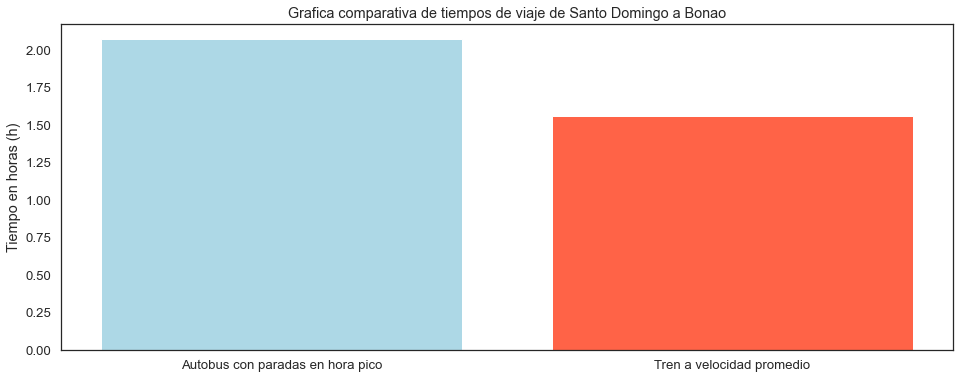

In [32]:
eje_x = ['Autobus con paradas en hora pico', 'Tren a velocidad promedio']
eje_y = [round(t_autobus_bonao/3600,2),round(t_tren_bonao/3600,2)]
plt.bar(eje_x, eje_y, color=['lightblue','tomato'])
plt.ylabel('Tiempo en horas (h)')
plt.title('Grafica comparativa de tiempos de viaje de Santo Domingo a Bonao')
plt.show()

In [33]:
precio_autobus_bonao=200

print('Tiempo al usar autobus en horas pico:',round(t_autobus_bonao/3600,2),'h',' Precio: RD$',precio_autobus_bonao)
print('Tiempo al usar tren con velocidad promedio:',round(t_tren_bonao/3600,2),'h',' Precio: RD$',precio_tren)

Tiempo al usar autobus en horas pico: 2.07 h  Precio: RD$ 200
Tiempo al usar tren con velocidad promedio: 1.56 h  Precio: RD$ 345


# Variacion de tardanza en distintas horas del dia (de 6am a 8pm)

In [34]:
s = pd.Series({'6:00': 858, '7:00': 1560, '8:00': 1380, '9:00': 1020, '10:00': 840, '11:00': 900, '12:00': 1560, '13:00': 1680,
               '14:00': 1600, '15:00': 1020, '16:00': 960, '17:00': 1020, '18:00': 1380, '19:00': 1320, '20:00': 1080})

In [35]:
def calculo_tiempo_tapones_variados(system,horarios): 
    t_trayecto=TimeSeries()
    t_trayecto1=pd.Series({'6:00': 0, '7:00': 0, '8:00': 0, '9:00': 0, '10:00': 0, '11:00': 0, '12:00': 0, '13:00': 0,
               '14:00': 0, '15:00': 0, '16:00': 0, '17:00': 0, '18:00': 0, '19:00': 0, '20:00': 0})
    tiempos=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    dist=[system.dist_parada1,system.dist_parada2,system.dist_parada3]
    arr=[0,1,2]
    tfinal=0
    for parada in arr:
        t_trayecto[parada]=2*dist[parada]/system.v
    
    for t in arr:
        tfinal+=t_trayecto[t]
        
    for hora in linrange(0,15,1):
        t_trayecto1[hora]=(tfinal+horarios[hora]+system.t_parada*2)
        t_trayecto1[hora]=float(t_trayecto1[hora])/100
        tiempos[hora]=(float(t_trayecto1[hora])/3600)*100
        tiempos[hora]=round(tiempos[hora],2)
        
    return tiempos

In [36]:
a=calculo_tiempo_tapones_variados(autobus,s)

In [37]:
def calculo_tiempo_sintapones_variados(system,horarios): 
    t_trayecto=TimeSeries()
    t_trayecto1=pd.Series({'6:00': 0, '7:00': 0, '8:00': 0, '9:00': 0, '10:00': 0, '11:00': 0, '12:00': 0, '13:00': 0,
               '14:00': 0, '15:00': 0, '16:00': 0, '17:00': 0, '18:00': 0, '19:00': 0, '20:00': 0})
    dist=[system.dist_parada1,system.dist_parada2,system.dist_parada3]
    arr=[0,1,2]
    tfinal=0
    for parada in arr:
        t_trayecto[parada]=2*dist[parada]/system.v
    
    for t in arr:
        tfinal+=t_trayecto[t]
        
    for hora in linrange(0,15,1):
        t_trayecto1[hora]=(tfinal+horarios[hora]+system.t_parada*2)/3600
    
    return t_trayecto1

In [38]:
t = pd.Series({'6:00': 0, '7:00': 0, '8:00': 0, '9:00': 0, '10:00': 0, '11:00': 0, '12:00': 0, '13:00': 0,
               '14:00': 0, '15:00': 0, '16:00': 0, '17:00': 0, '18:00': 0, '19:00': 0, '20:00': 0})

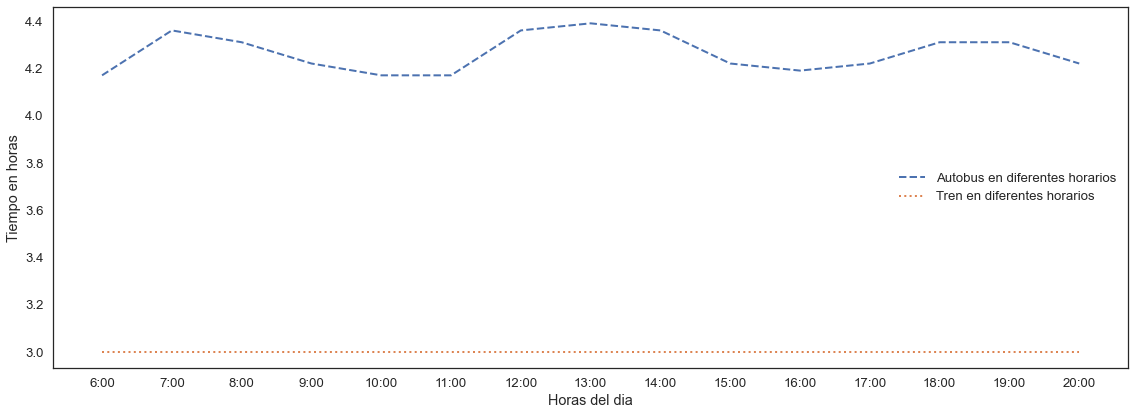

In [39]:
b=calculo_tiempo_sintapones_variados(tren_v_avg,t)
c=calculo_tiempo_sintapones_variados(autobus,t)
d=calculo_tiempo_sintapones_variados(tren_v_max,t)

plt.rcParams["figure.figsize"] = (16,6)
plot(a,'--',label='Autobus en diferentes horarios')
plot(b,':',label='Tren en diferentes horarios')

decorate(xlabel='Horas del dia',
 ylabel='Tiempo en horas')

# Simulacion del desplazamiento de pasajeros en un viaje

In [40]:
autobus_capacidad = 54

def pasajeros_autobus(autobus_capacidad):
    pasajeros_autobus= pd.Series({'Punto de Partida SD': 0, 'Parada 1 Bonao': 0, 'Parada 2 La Vega': 0, 'Punto de Llegada Santiago': 0})
    arr=[0,1,2]
    total_pasajeros=random.randrange(10,autobus_capacidad)
    
    for parada in arr:
        pasajeros_autobus[parada] = total_pasajeros
        if(parada == 1):
            e=truncnorm.rvs(-1, 8, loc=0.3, scale=0.2)#probabilidad de que se baje un pasajero
            total_pasajeros = pasajeros_autobus[0]
            pasajeros_menos = (total_pasajeros * (e*100))/100 #pasajeros que se bajaron en la parada         
            pasajeros_autobus[parada] = total_pasajeros-pasajeros_menos
        
        if(parada==2):
            total_pasajeros=pasajeros_autobus[parada-1]
            pasajeros_menos = (total_pasajeros * (e*100))/100 #pasajeros que se bajaron en la parada         
            pasajeros_autobus[parada] = total_pasajeros-pasajeros_menos
            
    return pasajeros_autobus

In [41]:
tren_capacidad = 182

def pasajeros_tren(tren_capacidad):
    pasajeros_tren=pd.Series({'Punto de Partida SD': 0, 'Parada 1 Bonao': 0, 'Parada 2 La Vega': 0, 'Punto de Llegada Santiago': 0})
    arr=[0,1,2]
    pasajeros_mas=[0,0]
    total_pasajeros=random.randrange(35,tren_capacidad)
    
    for parada in arr:
        if(parada == 0):
            pasajeros_tren[parada] = total_pasajeros
            
        if(parada == 1):
            e=truncnorm.rvs(-1, 8, loc=0.3, scale=0.2)
            total_pasajeros=pasajeros_tren[0]
            pasajeros_menos = (total_pasajeros * (e*100))/100
            pasajeros_tren[parada] = total_pasajeros-pasajeros_menos
            
            a=truncnorm.rvs(-1, 8, loc=0.3, scale=0.2)
            pasajeros_mas[0] = (tren_capacidad * (a*100)) / 100
            
            if(pasajeros_tren[parada] + pasajeros_mas[0] > tren_capacidad):
                pasajeros_tren[parada]= 182
            else:
                pasajeros_tren[parada] = pasajeros_tren[parada] + pasajeros_mas[0]
                        
        if(parada == 2):
            total_pasajeros = pasajeros_tren[parada-1]
            pasajeros_menos = (total_pasajeros * (e*100))/100
            pasajeros_tren[parada] = total_pasajeros-pasajeros_menos
            
            a=truncnorm.rvs(-1, 8, loc=0.3, scale=0.2)
            pasajeros_mas[1] = (tren_capacidad * (a*100)) / 100
            
            if(pasajeros_tren[parada] + pasajeros_mas[1] > tren_capacidad):
                pasajeros_tren[parada]= 182
            else:
                pasajeros_tren[parada] = pasajeros_tren[parada] + pasajeros_mas[1]
            
    return pasajeros_tren, pasajeros_mas

In [42]:
pasajeros_tren,pasajeros_mas=pasajeros_tren(tren_capacidad)
pasajeros_autobus = pasajeros_autobus(autobus_capacidad)

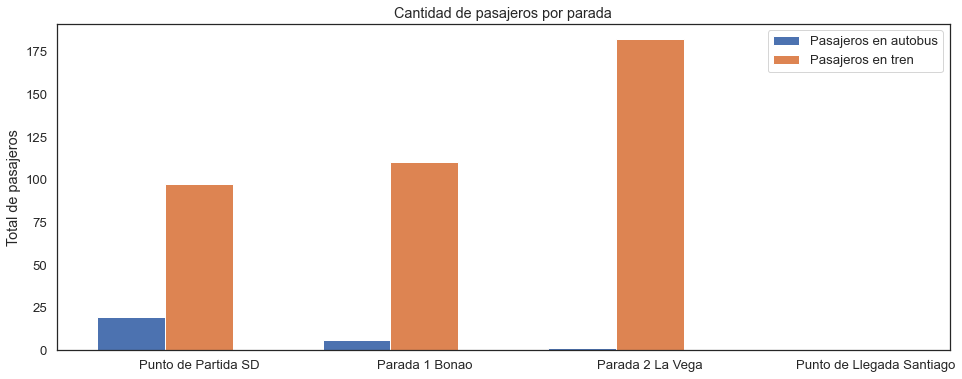

In [43]:
numgrupos = len(pasajeros_autobus)
indice_barras = np.arange(numgrupos)
ancho_barras = 0.30
 
plt.bar(indice_barras, pasajeros_autobus, width=ancho_barras, label='Pasajeros en autobus')
plt.bar(indice_barras + ancho_barras, pasajeros_tren, width=ancho_barras, label='Pasajeros en tren')
plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barras, ('Punto de Partida SD', 'Parada 1 Bonao', 'Parada 2 La Vega', 'Punto de Llegada Santiago'))
 
plt.ylabel('Total de pasajeros')
plt.title('Cantidad de pasajeros por parada')
 
plt.show()

In [44]:
print('Pasajeros en autobus:', pasajeros_autobus)
print('Pasajeros en tren:', pasajeros_tren)

Pasajeros en autobus: Punto de Partida SD          19
Parada 1 Bonao                6
Parada 2 La Vega              1
Punto de Llegada Santiago     0
dtype: int64
Pasajeros en tren: Punto de Partida SD           97
Parada 1 Bonao               110
Parada 2 La Vega             182
Punto de Llegada Santiago      0
dtype: int64


# Ganancia bruta por viaje

In [45]:
print('Tarifa de SD a Santiago en Caribe Tours: RD$',precio_autobus)
print('Tarifa de SD a Santiago en Tren: RD$',precio_tren)

Tarifa de SD a Santiago en Caribe Tours: RD$ 300
Tarifa de SD a Santiago en Tren: RD$ 345


In [46]:
def ganancias_autobus(precio,viaje):
    ganancias=precio*viaje[0] #ganancia brutas Caribe Tours por viaje
    
    return ganancias

In [47]:
ganancias_viaje_autobus=ganancias_autobus(precio_autobus, pasajeros_autobus)
print('Ganancia bruta por viaje: RD$',ganancias_viaje_autobus)

Ganancia bruta por viaje: RD$ 5700


In [48]:
def ganancias_tren(precio,viaje, pasajeros_mas):
    total_pasajeros_viaje = viaje[0]+pasajeros_mas[0]+pasajeros_mas[1]
    ganancias=precio*total_pasajeros_viaje #ganancias tren por viaje
    
    return ganancias

In [49]:
ganancias_viaje_tren=ganancias_tren(precio_tren,pasajeros_tren,pasajeros_mas)
print('Ganancia bruta por viaje: RD$',round(ganancias_viaje_tren,2))

Ganancia bruta por viaje: RD$ 83958.86
